**Instagram Reach Analysis using Python**

1. Importing the necessary Python libraries and the dataset:





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
import plotly.express as px
data = pd.read_csv( "/content/Instagram data.csv", encoding = 'latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits       Location  Follows  \
0         9       5    162              35          India        2   
1         7      14    224              48  United States       10   
2        11       1    131              62  United States       12   
3        10       7    213              23          Japan        8   
4         5       4    123               8         Mexico        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  H

2. let’s have a look at whether this dataset contains any null values or not:



In [ ]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Location          0
Follows           0
Caption           0
Hashtags          0
dtype: int64

3. Let’s drop all these null values and move further:

In [ ]:
data = data.dropna()

4. Let’s have a look at the insights of the columns to understand the data type of all the columns:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Location        119 non-null    object
 11  Follows         119 non-null    int64 
 12  Caption         119 non-null    object
 13  Hashtags        119 non-null    object
dtypes: int64(11), object(3)
memory usage: 13.1+ KB


5. Here is the Heatmap of the dataset

<ipython-input-43-241cd916cbe2>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



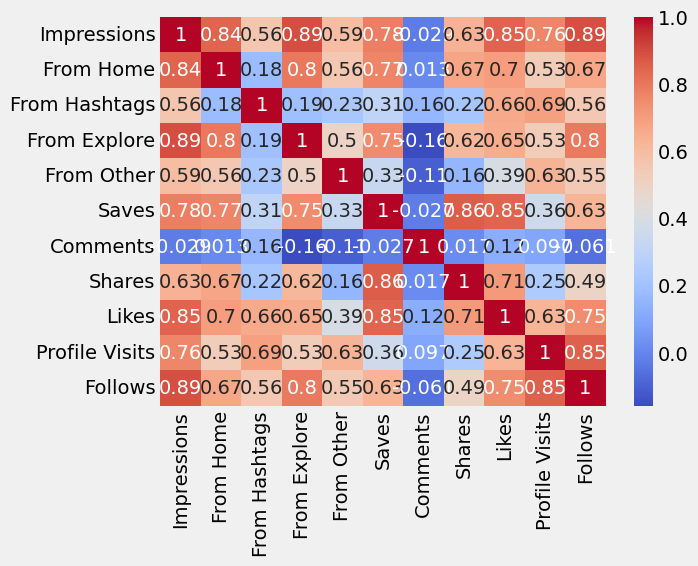

In [ ]:
import seaborn as sns
#Create a HeatMap of the correlation between all columns in the dataset
sns.heatmap(data.corr(),annot=True, cmap ='coolwarm')
plt.show()

**Source Analysis:**

6. *Certainly, let’s begin by analyzing the distribution of impressions received from followers’ feeds (From Home). This analysis will provide insights into how content is performing in terms of organic reach to existing audience.*

<ipython-input-6-56b9aea354db>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




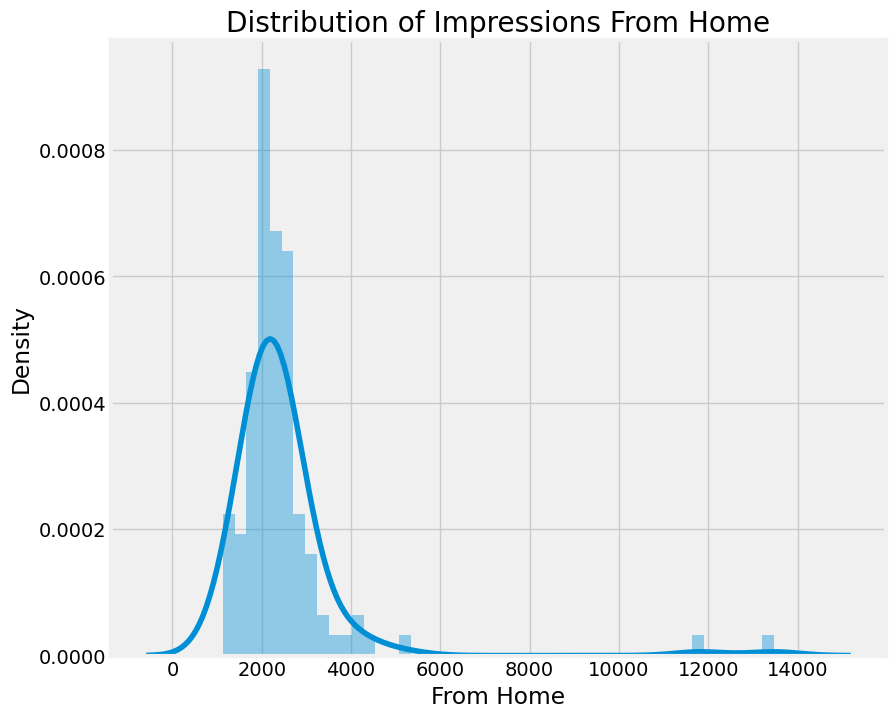

In [ ]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

**Conclusion:** *The impressions received on Instagram’s home page demonstrate how widely the posts are seen by the followers. It’s difficult to reach all the followers every day, can be interpreted after observing the reactions from the house.*

7. let’s have a look at the distribution of the impressions received from hashtags:



<ipython-input-7-8c45b7b41edc>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




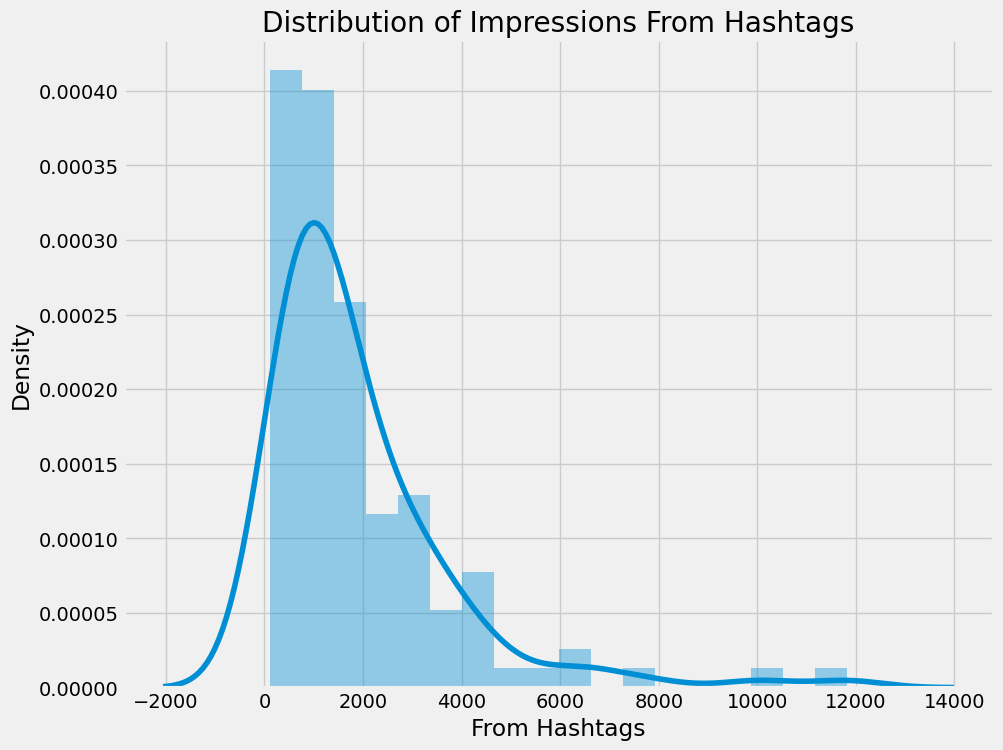

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

**Conclusion:** *Hashtags serve as essential tools on Instagram, allowing us to categorize our posts and expand our reach by connecting with users interested in specific content categories. When we examine hashtag impressions, we realize that not all posts are equally discoverable through hashtags. However, hashtags offer a valuable avenue for reaching new users who share an interest in the content we create.*

8. Now let’s have a look at the distribution of impressions have received from the explore section of Instagram:

<ipython-input-8-3461ec84008d>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




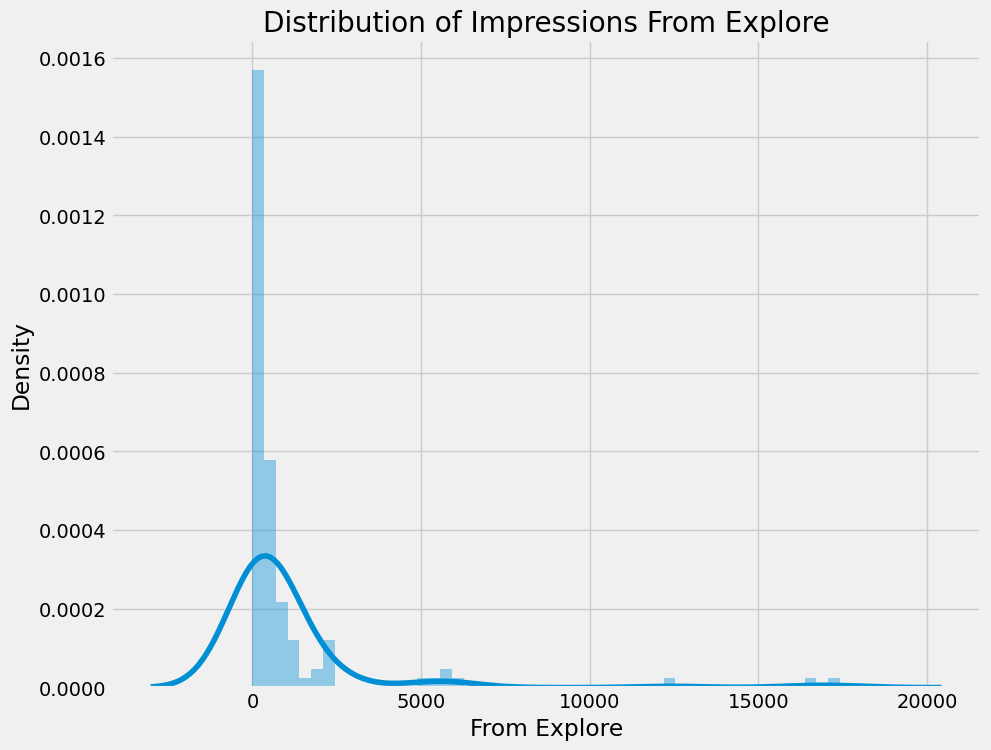

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()

**Conclusion:** *Instagram’s Explore section functions as the platform’s recommendation system, tailoring content to user preferences. However, our data indicates that our posts receive limited exposure through Explore, with hashtags driving more substantial reach. To enhance our reach, we should consider refining our hashtag strategy.*

9. Now let’s have a look at the percentage of impressions get from various sources on Instagram:

In [ ]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels,
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

**Conclusion: **The donut plot illustrates that the content’s reach on Instagram is primarily distributed as follows:

Approximately 44.1% of the reach is attributed to the followers, indicating that the existing audience plays a significant role in content’s visibility.

Around 33.6% of the reach is driven by the use of hashtags, emphasizing the importance of categorizing the content with relevant hashtags to connect with a broader audience.

Approximately 19.2% of the reach comes from the Explore section, signifying that Instagram’s algorithm is helping expose the content to new potential followers.

About 3.05% of the reach originates from various other sources, which may include direct shares or referrals from external channels.

Understanding this distribution of reach allows us to tailor content strategy to maximize engagement from these different sources, ultimately contributing to long-term success on Instagram.

10. *Analyzing Content*

Let’s create a wordcloud of the caption column to look at the most used words in the caption of Instagram posts:

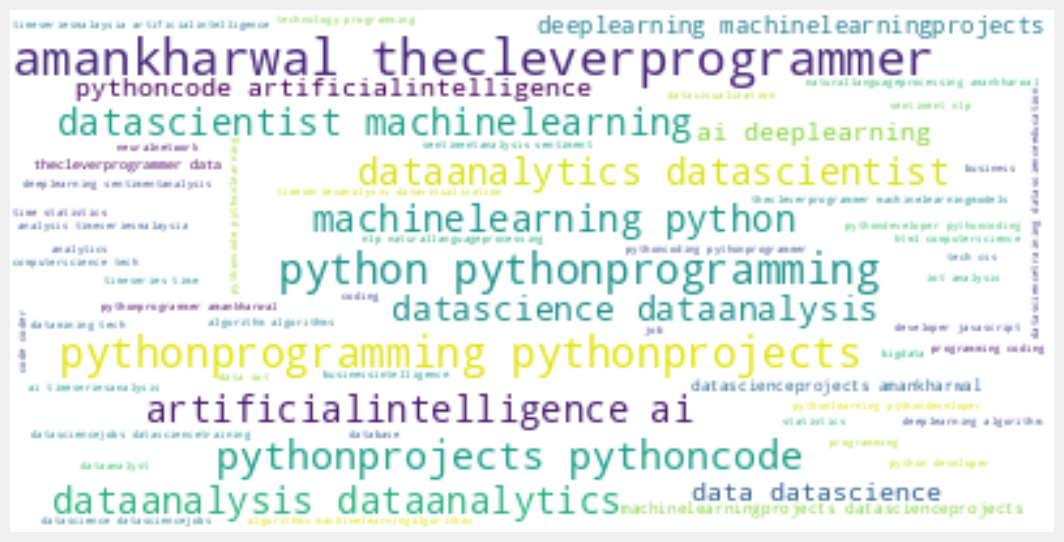

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Conclusion:**

*Creating a word cloud from the hashtags column will allow us to identify the most frequently used hashtags in your Instagram posts. This visual representation will give us insights into the popular hashtags associated with your content.*

11. *Analyzing Relationships*

let’s analyze relationships to find the most important factors of our Instagram reach. It will also help us in understanding how the Instagram algorithm works.



In [ ]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols",
                    title = "Relationship Between Likes and Impressions")
figure.show()

**Conclusion: **

*A linear relationship exists between the number of likes and your Instagram reach. This implies that as the number of likes on your posts increases, there is a proportional increase in the reach of your content. This insight highlights the positive influence of user engagement (likes) on your content’s visibility and reach.*

 12. Now let’s see the relationship between the number of comments and the number of impressions on my Instagram posts:

In [ ]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols",
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

**Conclusion:**

*The presence of a negative linear relationship between the number of comments and your Instagram reach suggests that, in your case, there is no significant impact on reach based on the number of comments. It appears that the number of comments does not substantially influence the visibility or reach of your posts. This insight indicates that user engagement through comments may not be a driving factor for expanding the reach of your content.*

13. let’s have a look at the relationship between the number of saves and the number of impressions:

In [ ]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols",
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

**Conclusion:**

 *The presence of a linear relationship between the number of times your post is saved and the reach of your Instagram post indicates that as the number of saves increases, there is a proportional increase in the reach or visibility of your content. This suggests that the action of users saving your posts positively influences the exposure and reach of your Instagram content. Understanding this correlation can help you tailor your content strategy to optimize your reach and audience impact.*

14. Now let’s have a look at the correlation of all the columns with the Impressions column:

*Examining the correlation of all the columns with the “Impressions” column will provide valuable insights into how various factors relate to and influence the reach and visibility of your Instagram content.*

*This analysis will help us identify which elements have the strongest positive or negative correlations with Impressions, offering guidance on optimizing your content strategy for enhanced reach and impact.*

In [ ]:
correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


<ipython-input-15-e57b1c4dec3a>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



**Conlusion:**

*To increase your impressions on Instagram, it’s essential to focus on metrics like “From Explore,” “Follows,” “Likes,” “Saves,” “Profile Visits,” “Shares,” “From Other,” and “From Hashtags.”*

*Additionally, comments seem to have minimal to no influence on impressions, as indicated by the weak negative correlation.*

 15. *Analyzing Conversion Rate*

 let’s have a look at the conversation rate of Instagram account:

*This metric provides insights into how successful your content is in turning profile visits into followers. Understanding your conversion rate is vital for assessing the effectiveness of your content strategy in attracting and retaining new followers on Instagram.*


In [ ]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


**Conclusion:**

 * A conversion rate of 41% is indeed a strong and impressive metric for your Instagram account.

 *This high conversion rate indicates that a significant portion of the users who visit your profile end up following you.

 *It’s a clear sign that your content and engagement strategies are effective in attracting and retaining new followers.
   
 *This is a positive indicator of your Instagram account’s performance in converting profile visits into a growing follower base.

16. Let’s have a look at the relationship between the total profile visits and the number of followers gained from all profile visits:



In [ ]:
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols",
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

**Conclusion:**

*The presence of a linear relationship between profile visits and followers gained indicates that as the number of profile visits increases, there is a proportional increase in the number of new followers gained.*

*This insight highlights the direct impact of profile visits on your follower growth, suggesting that an increase in profile visits positively contributes to your follower acquisition.*

17. *Instagram Reach Prediction Model*

 Now let's train a machine learning model to predict the reach of an Instagram post, and split the data into training and test sets before training the model:



In [ ]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares',
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.2,
                                                random_state=42)

18. here’s is how we can train a machine learning model to predict the reach of an Instagram post using Python:

*To ensure the model’s accuracy, we will first divide the data into training and test sets. This separation allows us to train the model on one portion of the data and evaluate its performance on another, ensuring its effectiveness in predicting reach for your Instagram content.*



In [ ]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.9248200796839092

19. Now let’s predict the reach of an Instagram post by giving inputs to the machine learning model:

 *This enables us to estimate how well a post is expected to perform in terms of reach before publishing it on your Instagram account.*

In [ ]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([11924.82957324])

20. Here is the real time example of Instagram Reach Analysis

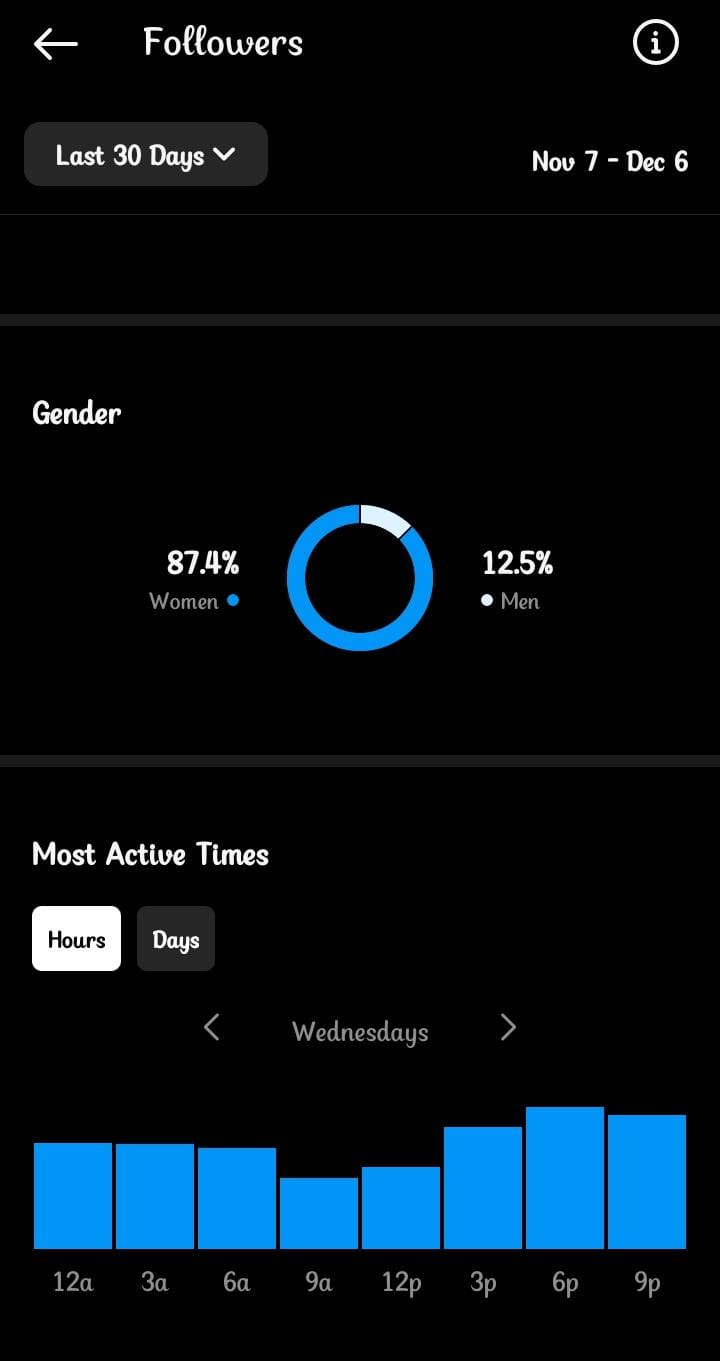
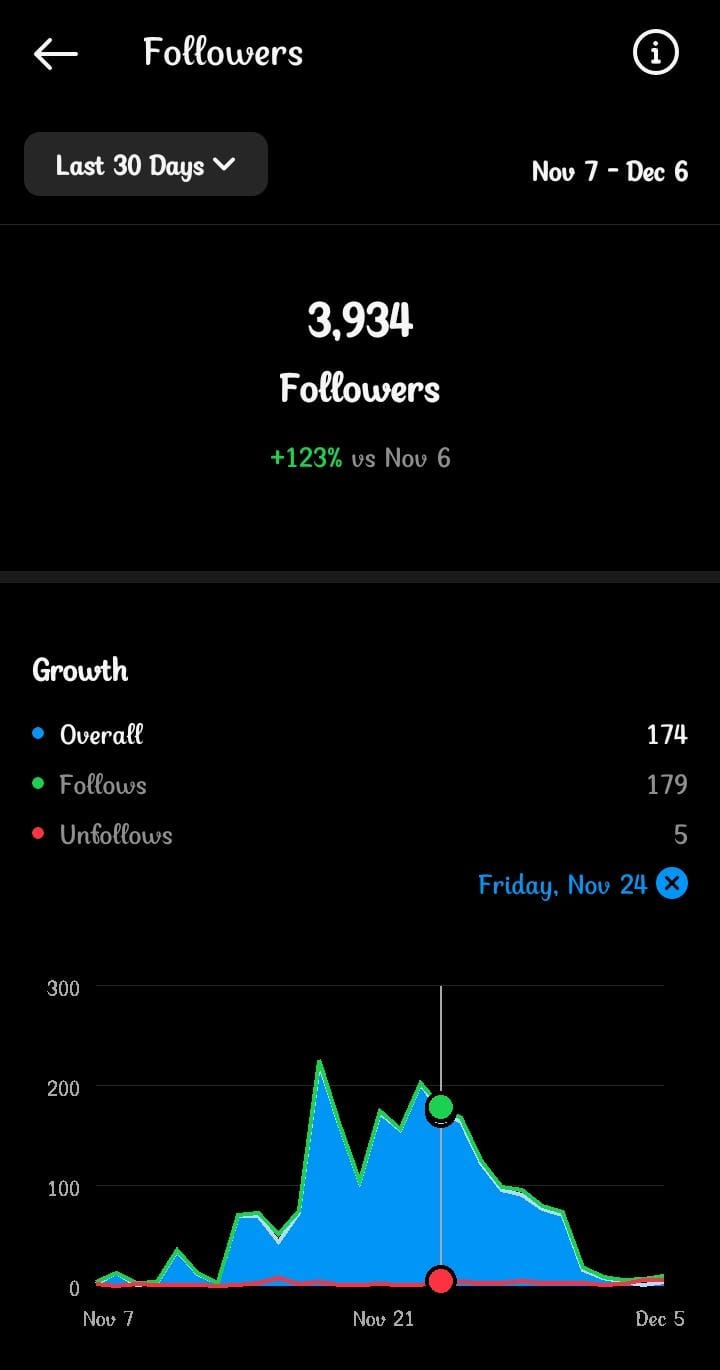
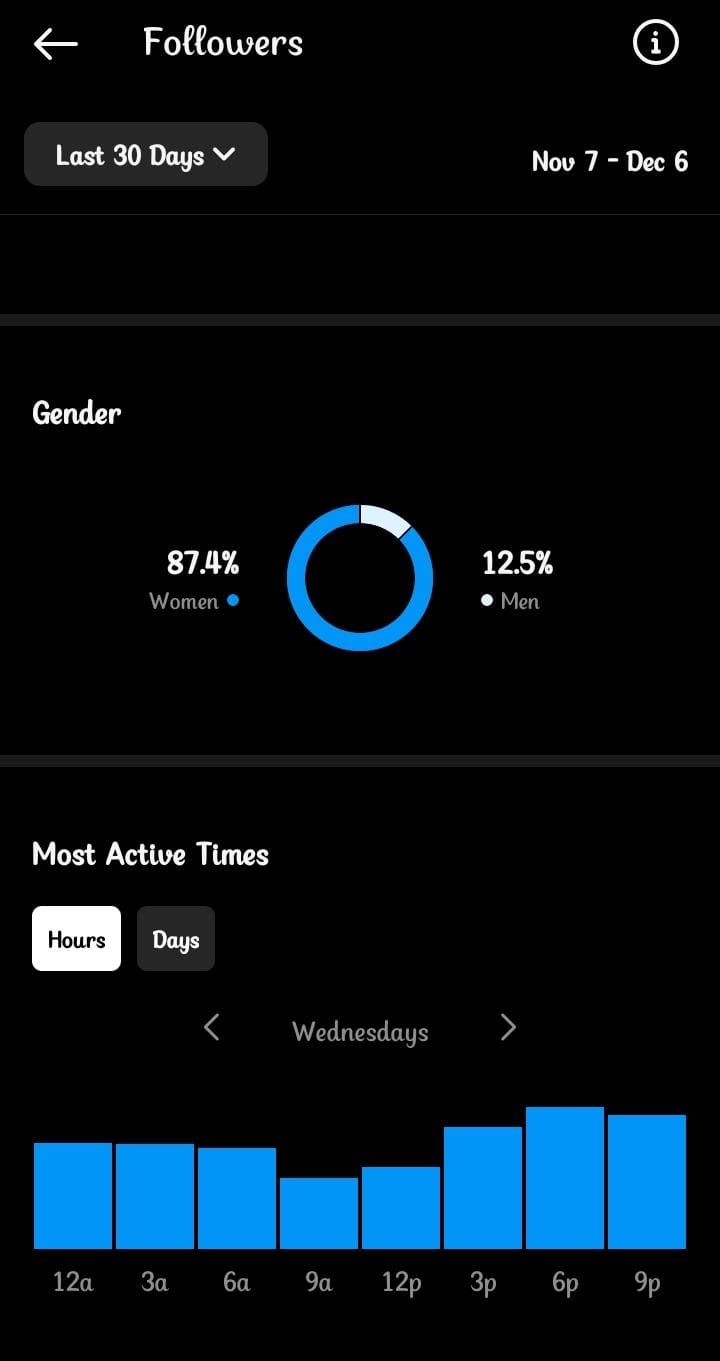

**Summary:**

Indeed, analyzing and predicting the reach of Instagram posts using machine learning in Python is a valuable approach for content creators seeking long-term success on the platform.

By leveraging data science and statistical analysis, creators can gain critical insights into their content’s performance, optimize their strategies, and engage with their audience effectively.

 Understanding and adapting to the changing dynamics of social media platforms like Instagram is essential for content creators, and data-driven approaches are key to achieving sustained growth and impact.
